<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo semanal 4 Bis2 - Colaborativo

#### Ana Nuñez y Santiago Palozzo


# Consigna

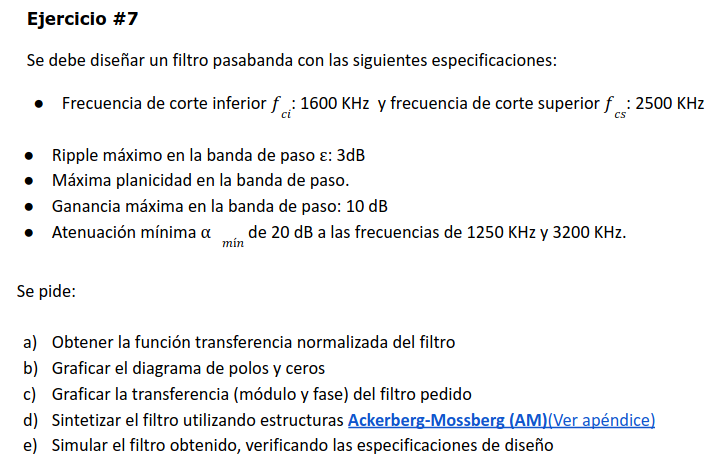


# Desarrollo analítico


In [4]:
from IPython.display import IFrame
IFrame("./TS4BIS.pdf", width=1000, height=1000)

# Simulación numérica circuital

num =  [0.091125 0.       0.       0.      ] 
 den =  [1.       0.9      3.405    1.891125 3.405    0.9      1.      ]
z =  [0. 0. 0.] 
 p =  [-0.13414404+1.20766417j -0.13414404-1.20766417j -0.225     +0.97435876j
 -0.225     -0.97435876j -0.09085596+0.81795274j -0.09085596-0.81795274j] 
 k = 0.09112500000000001


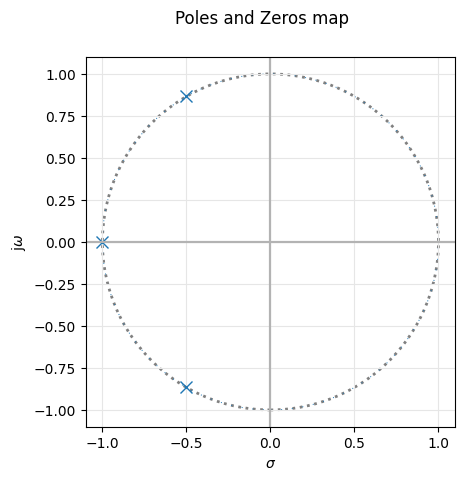

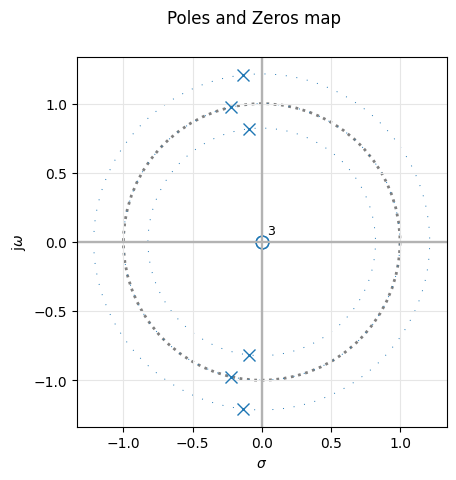

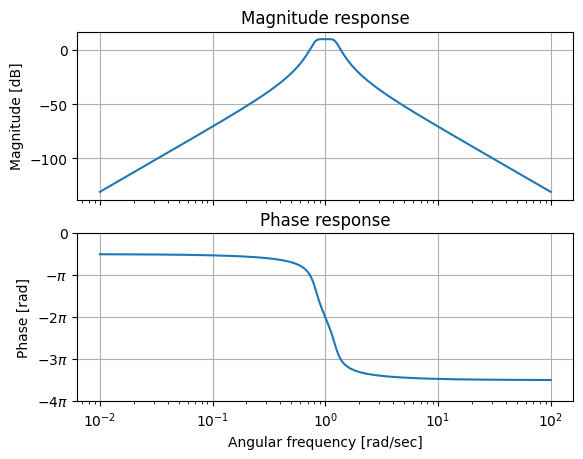

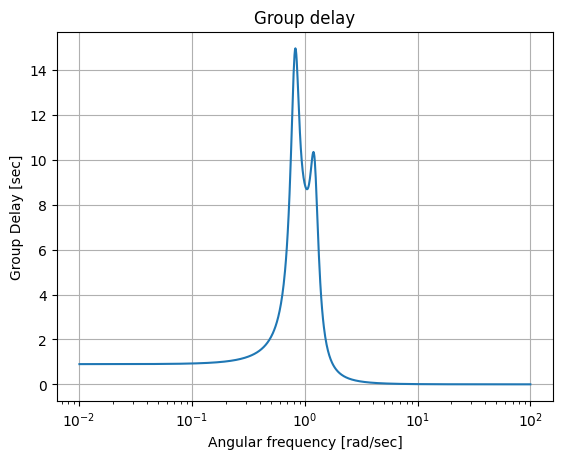

In [3]:
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as ss

from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot

#----------------------Definicion de las variables---------------------

xi = 1
BW = 9/20
k_10 = 3.162

#---------------------------Definicion de H_LP-------------------------

num = [1]
den = [1, 2, 2, 1 ]

Hnor = TransferFunction(num, den)

#-------------------------Transformacion LP a BP-----------------------

num, den = ss.lp2bp(num, den, xi , BW)
z, p, k = ss.tf2zpk(num, den)

#----Multiplico por la constante para lograr una ganancia de 10 dB-----

H = TransferFunction(k_10 * num, den)

#-----------------------------Visualizacion----------------------------

pzmap(Hnor, fig_id = 1) #S plane pole/zero plot
pzmap(H, fig_id = 2) #S plane pole/zero plot
bodePlot(H, fig_id = 3)
GroupDelay(H, fig_id = 4)
print("num = ", num, "\n",  "den = ", den)
print("z = ", z, "\n", "p = ", p, "\n", "k =", k)
  


# Simulación del circuito en LTSpice

Se realizó la simulación en LTSpice para corroborar los resultados obtenidos. A continuación se muestran el circuito y su transferencia. 

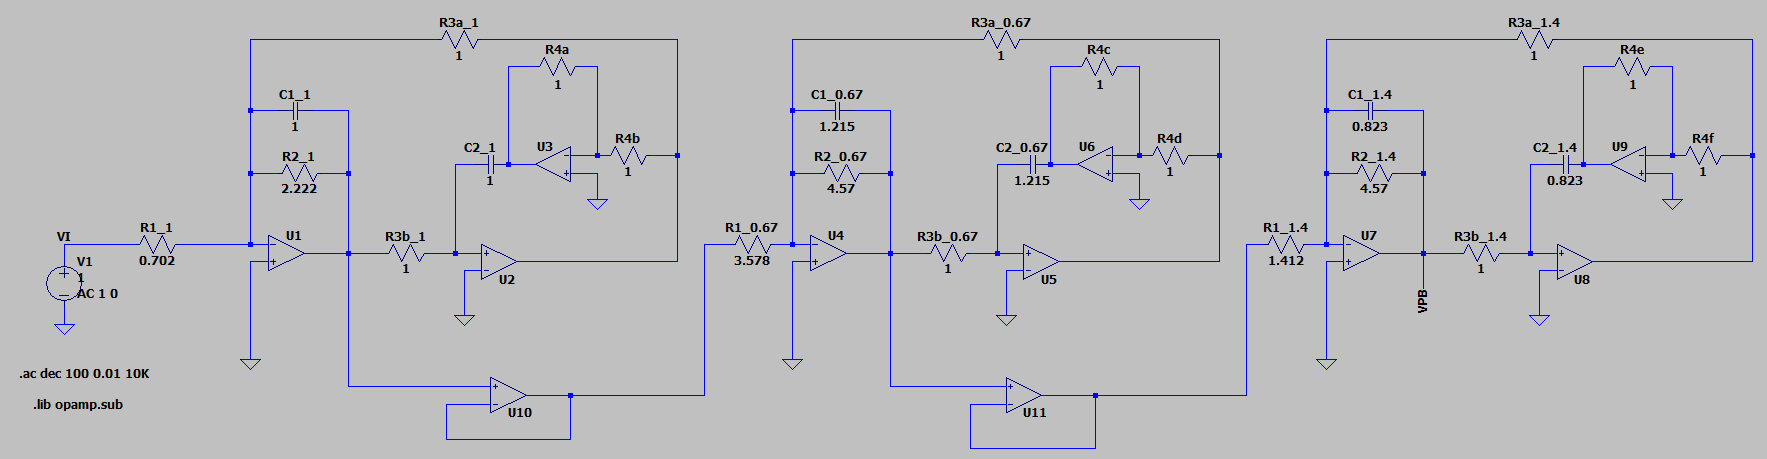

Se destacan los puntos importantes con el cursor:

$|T(\omega = 2\pi fp1)| = 7,087dB$, verifica que $\alpha_{max} < 3db$ 

$|T(\omega = 2\pi fp2)| = 7,10dB$,  verifica que $\alpha_{max} < 3db$  

Tambien es importante destacar que $|T(\omega = 1)| = 9.84dB$ 

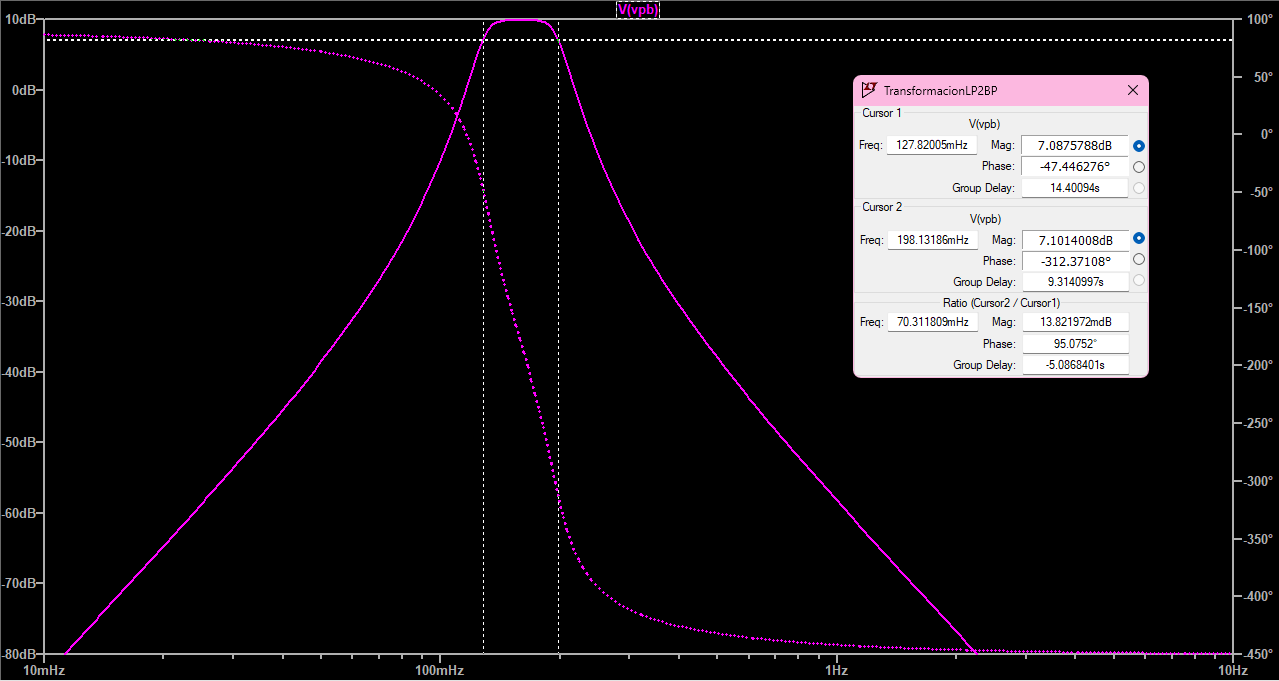

$|T(\omega = 2\pi fs1)| = -10,16dB$,  verifica que $\alpha_{min} > 20db$

$|T(\omega = 2\pi fs2)| = -10256dB$,  verifica que $\alpha_{min} > 20db$

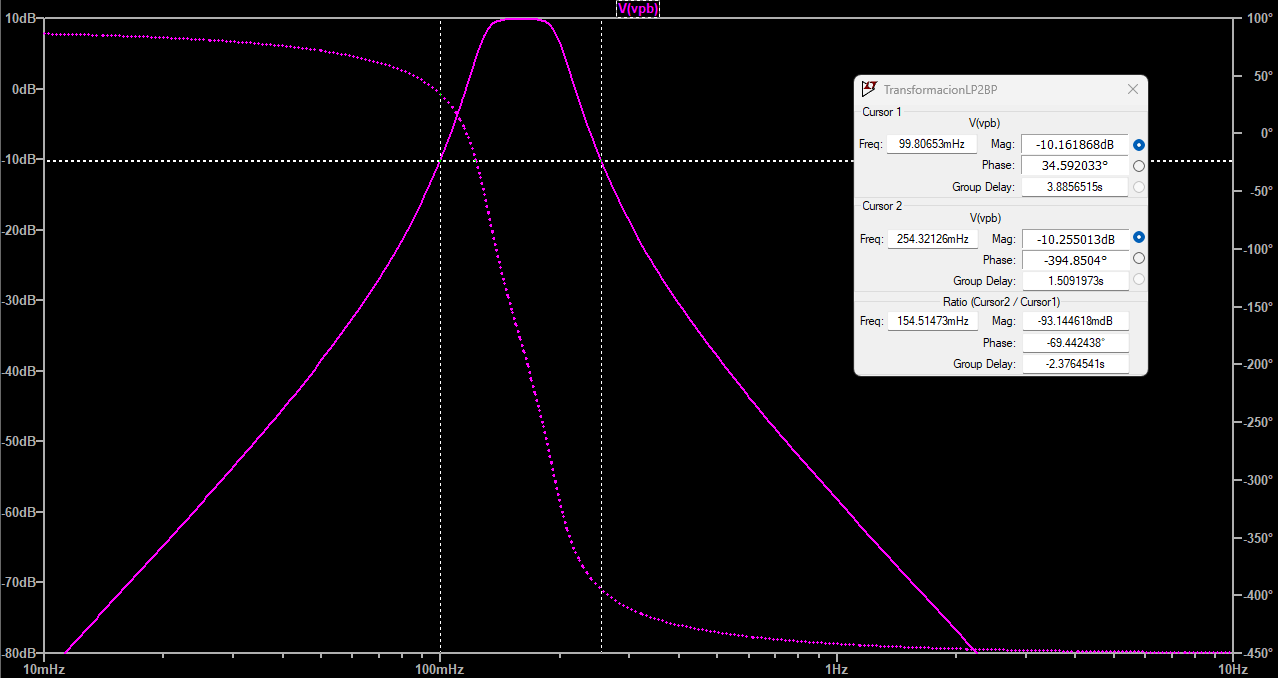
